<a href="https://colab.research.google.com/github/SLiv75/AI-Studio-2021-Final-/blob/main/Soundscape_ANNclassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# #Classification using Artificial Neural Networks

#Multi-Class Classification


In this example we will use a darts dataset that consist of dart throws by different competitors. The coordinate pairs xCoord and yCoord show where each dart landed. Each dart can only be thrown by one competitor. That means our classes are mutually exclusive, no dart can be thrown by two different competitors simultaneously.

Based on the landing position of previously thrown darts we should be able to distinguish between throwers if there's enough variation among them. In our pairplot we can see players tend to aim at certain regions of the board.

The model for this dataset has two neurons as inputs,since our predictors are xCoord and yCoord. We will define them using the input_shape argument



In [ ]:
# Import standard Libraries
import pandas as pd
import seaborn as sns
import altair as alt
import tensorflow as tf
import matplotlib.pyplot as plt
import joblib



sns.set(rc={'figure.figsize':(10,10)})
print("imports ok")

imports ok


##Load Data

In [ ]:
#connect google drive to this colab
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
# Load data file
data = pd.read_csv('/content/860_map_full_spectrum_combined_categories_simp_3.csv', usecols=['mintcream',
'darkkhaki',
'steelblue',
'whitesmoke',
'darkslategrey',
'indianred',
'dodgerblue',
'firebrick',
'palevioletred',
'lemonchiffon',
'category2'])

In [ ]:
print(data)

     darkkhaki  darkslategrey  dodgerblue  ...  steelblue  whitesmoke      category2
0     0.009773       0.001985         0.0  ...   0.000103    0.021678        natural
1     0.003271       0.000040         0.0  ...   0.000046    0.017356  anthropogenic
2     0.001241       0.000307         0.0  ...   0.000007    0.007028        natural
3     0.003061       0.001015         0.0  ...   0.000305    0.023204  anthropogenic
4     0.003412       0.000015         0.0  ...   0.000000    0.006260        natural
..         ...            ...         ...  ...        ...         ...            ...
823   0.003203       0.000031         0.0  ...   0.000022    0.017084       ambience
824   0.002508       0.000318         0.0  ...   0.000090    0.019533        natural
825   0.003107       0.000151         0.0  ...   0.000042    0.021807  anthropogenic
826   0.006743       0.000110         0.0  ...   0.000048    0.018746       ambience
827   0.005096       0.000090         0.0  ...   0.000088    0.01

In [ ]:
print(data["category2"].unique())

['natural' 'anthropogenic' 'ambience']


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 828 entries, 0 to 827
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   darkkhaki      828 non-null    float64
 1   darkslategrey  828 non-null    float64
 2   dodgerblue     828 non-null    float64
 3   firebrick      828 non-null    float64
 4   indianred      828 non-null    float64
 5   lemonchiffon   828 non-null    float64
 6   mintcream      828 non-null    float64
 7   palevioletred  828 non-null    float64
 8   steelblue      828 non-null    float64
 9   whitesmoke     828 non-null    float64
 10  category2      828 non-null    object 
dtypes: float64(10), object(1)
memory usage: 71.3+ KB


In [ ]:
data.describe()

,darkkhaki,darkslategrey,dodgerblue,firebrick,indianred,lemonchiffon,mintcream,palevioletred,steelblue,whitesmoke
count,828.000000,828.000000,828.000000,828.000000,828.000000,828.000000,828.000000,828.000000,828.000000,828.000000
mean,0.003207,0.000860,0.000011,0.000060,0.000232,0.005791,0.002381,0.000137,0.000075,0.021515
std,0.002070,0.001005,0.000041,0.000107,0.000248,0.004655,0.001285,0.000836,0.000075,0.005254
min,0.000004,0.000000,0.000000,0.000000,0.000000,0.000000,0.000094,0.000000,0.000000,0.002600
25%,0.001567,0.000167,0.000000,0.000000,0.000028,0.002091,0.001365,0.000000,0.000024,0.018823
50%,0.002982,0.000629,0.000000,0.000000,0.000162,0.004984,0.002181,0.000004,0.000052,0.021549
75%,0.004513,0.001063,0.000009,0.000092,0.000352,0.008273,0.003369,0.000015,0.000105,0.024251
max,0.011317,0.007548,0.000620,0.000893,0.001763,0.022616,0.006543,0.009823,0.000660,0.063782


In [ ]:
data.head()

,darkkhaki,darkslategrey,dodgerblue,firebrick,indianred,lemonchiffon,mintcream,palevioletred,steelblue,whitesmoke,category2
0,0.009773,0.001985,0.0,0.000393,0.000375,0.004655,0.003958,0.000004,0.000103,0.021678,natural
1,0.003271,0.000040,0.0,0.000000,0.000000,0.000375,0.001063,0.000000,0.000046,0.017356,anthropogenic
2,0.001241,0.000307,0.0,0.000000,0.000221,0.000072,0.000395,0.001331,0.000007,0.007028,natural
3,0.003061,0.001015,0.0,0.000000,0.000000,0.000614,0.001610,0.000000,0.000305,0.023204,anthropogenic
4,0.003412,0.000015,0.0,0.000000,0.000347,0.000006,0.000436,0.006556,0.000000,0.006260,natural


In [ ]:
# Transform into a categorical variable
data.category2 = pd.Categorical(data.category2)

# Assign a number to each category (label encoding)
data.category2 = data.category2.cat.codes 

# Print the label encoded competitors
print('Label encoded category: \n',data.head())

Label encoded category: 
    darkkhaki  darkslategrey  dodgerblue  ...  steelblue  whitesmoke  category2
0   0.009773       0.001985         0.0  ...   0.000103    0.021678          2
1   0.003271       0.000040         0.0  ...   0.000046    0.017356          1
2   0.001241       0.000307         0.0  ...   0.000007    0.007028          2
3   0.003061       0.001015         0.0  ...   0.000305    0.023204          1
4   0.003412       0.000015         0.0  ...   0.000000    0.006260          2

[5 rows x 11 columns]


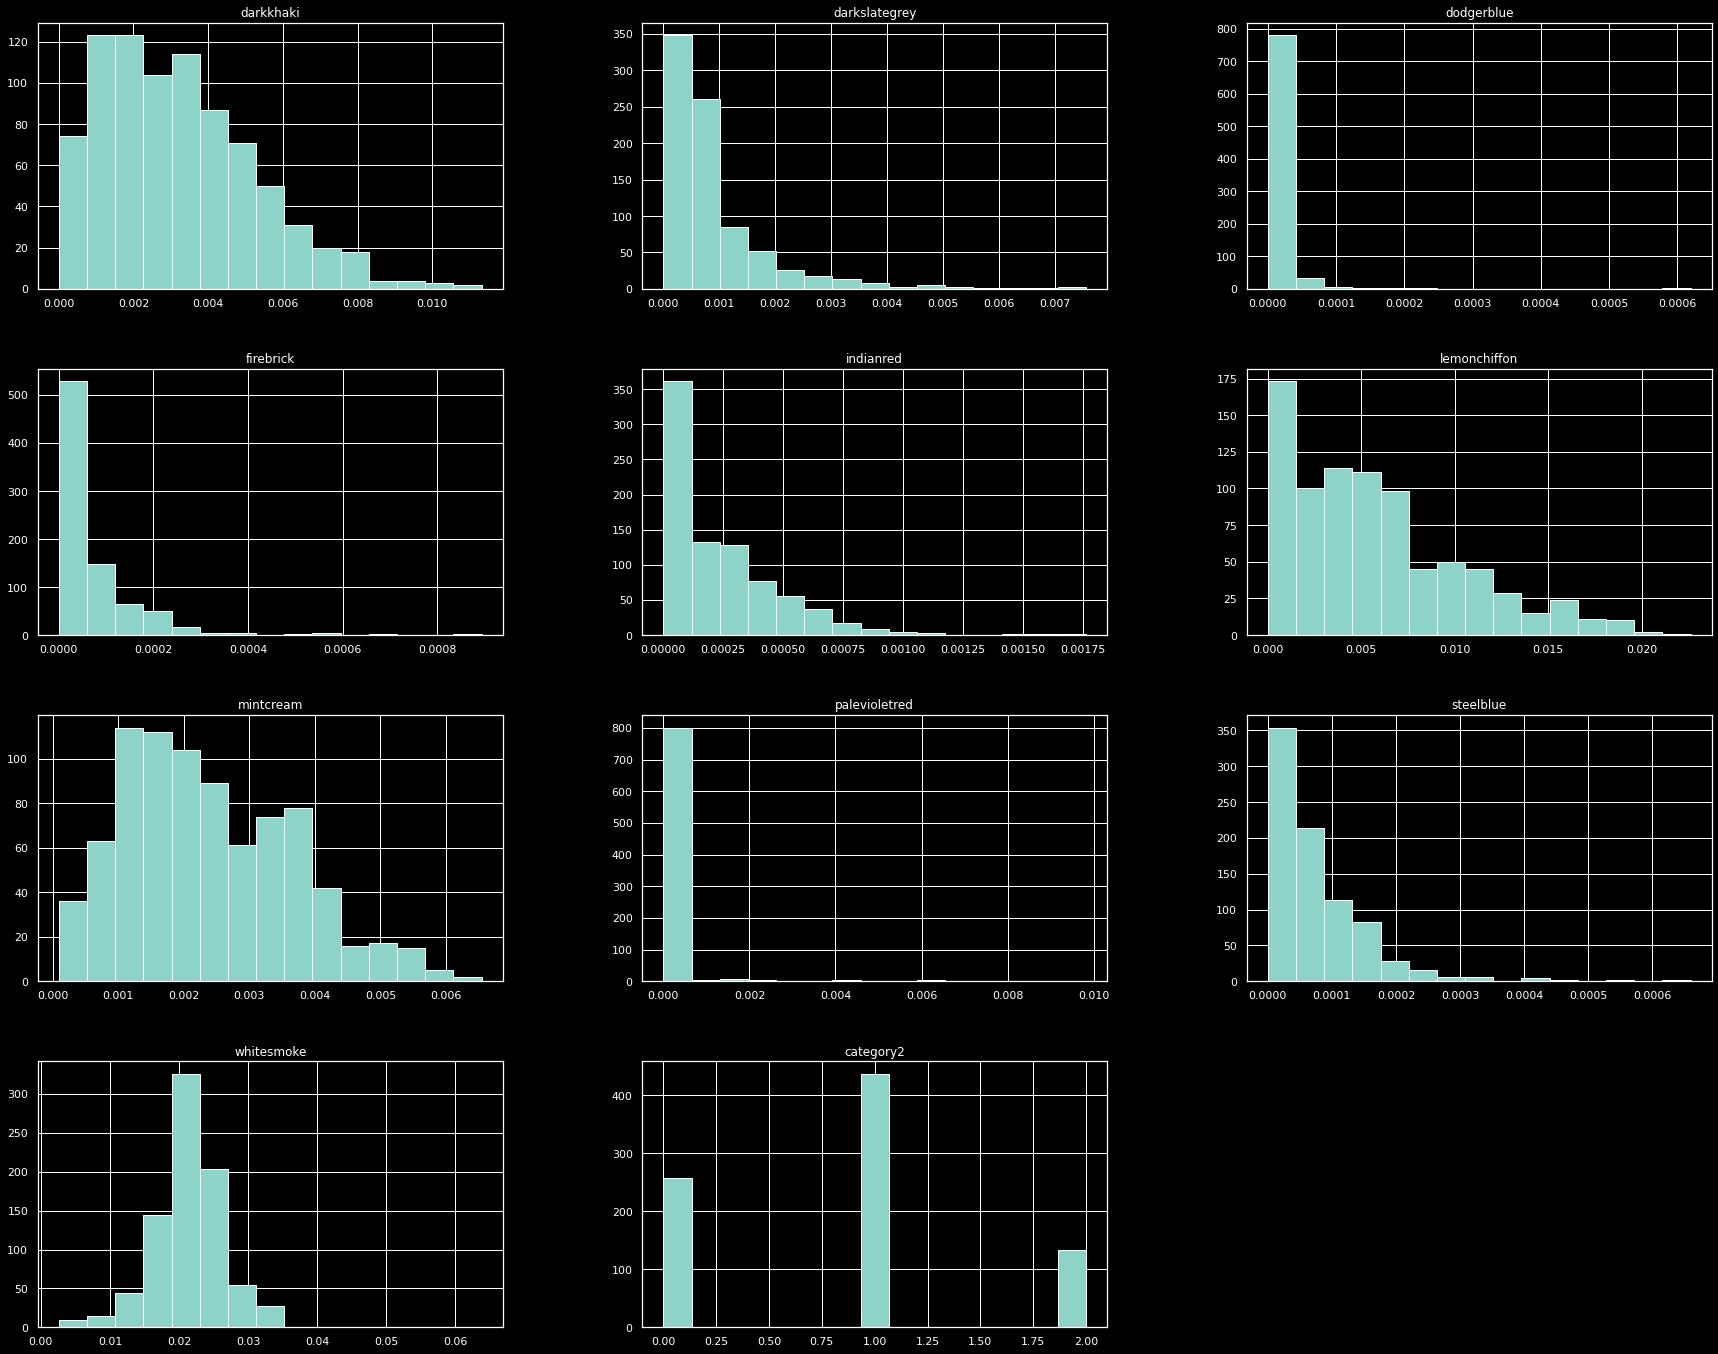

In [ ]:
plt.style.use('dark_background')

data.hist(figsize=(30,24),bins = 15)
plt.title("category")
plt.show()

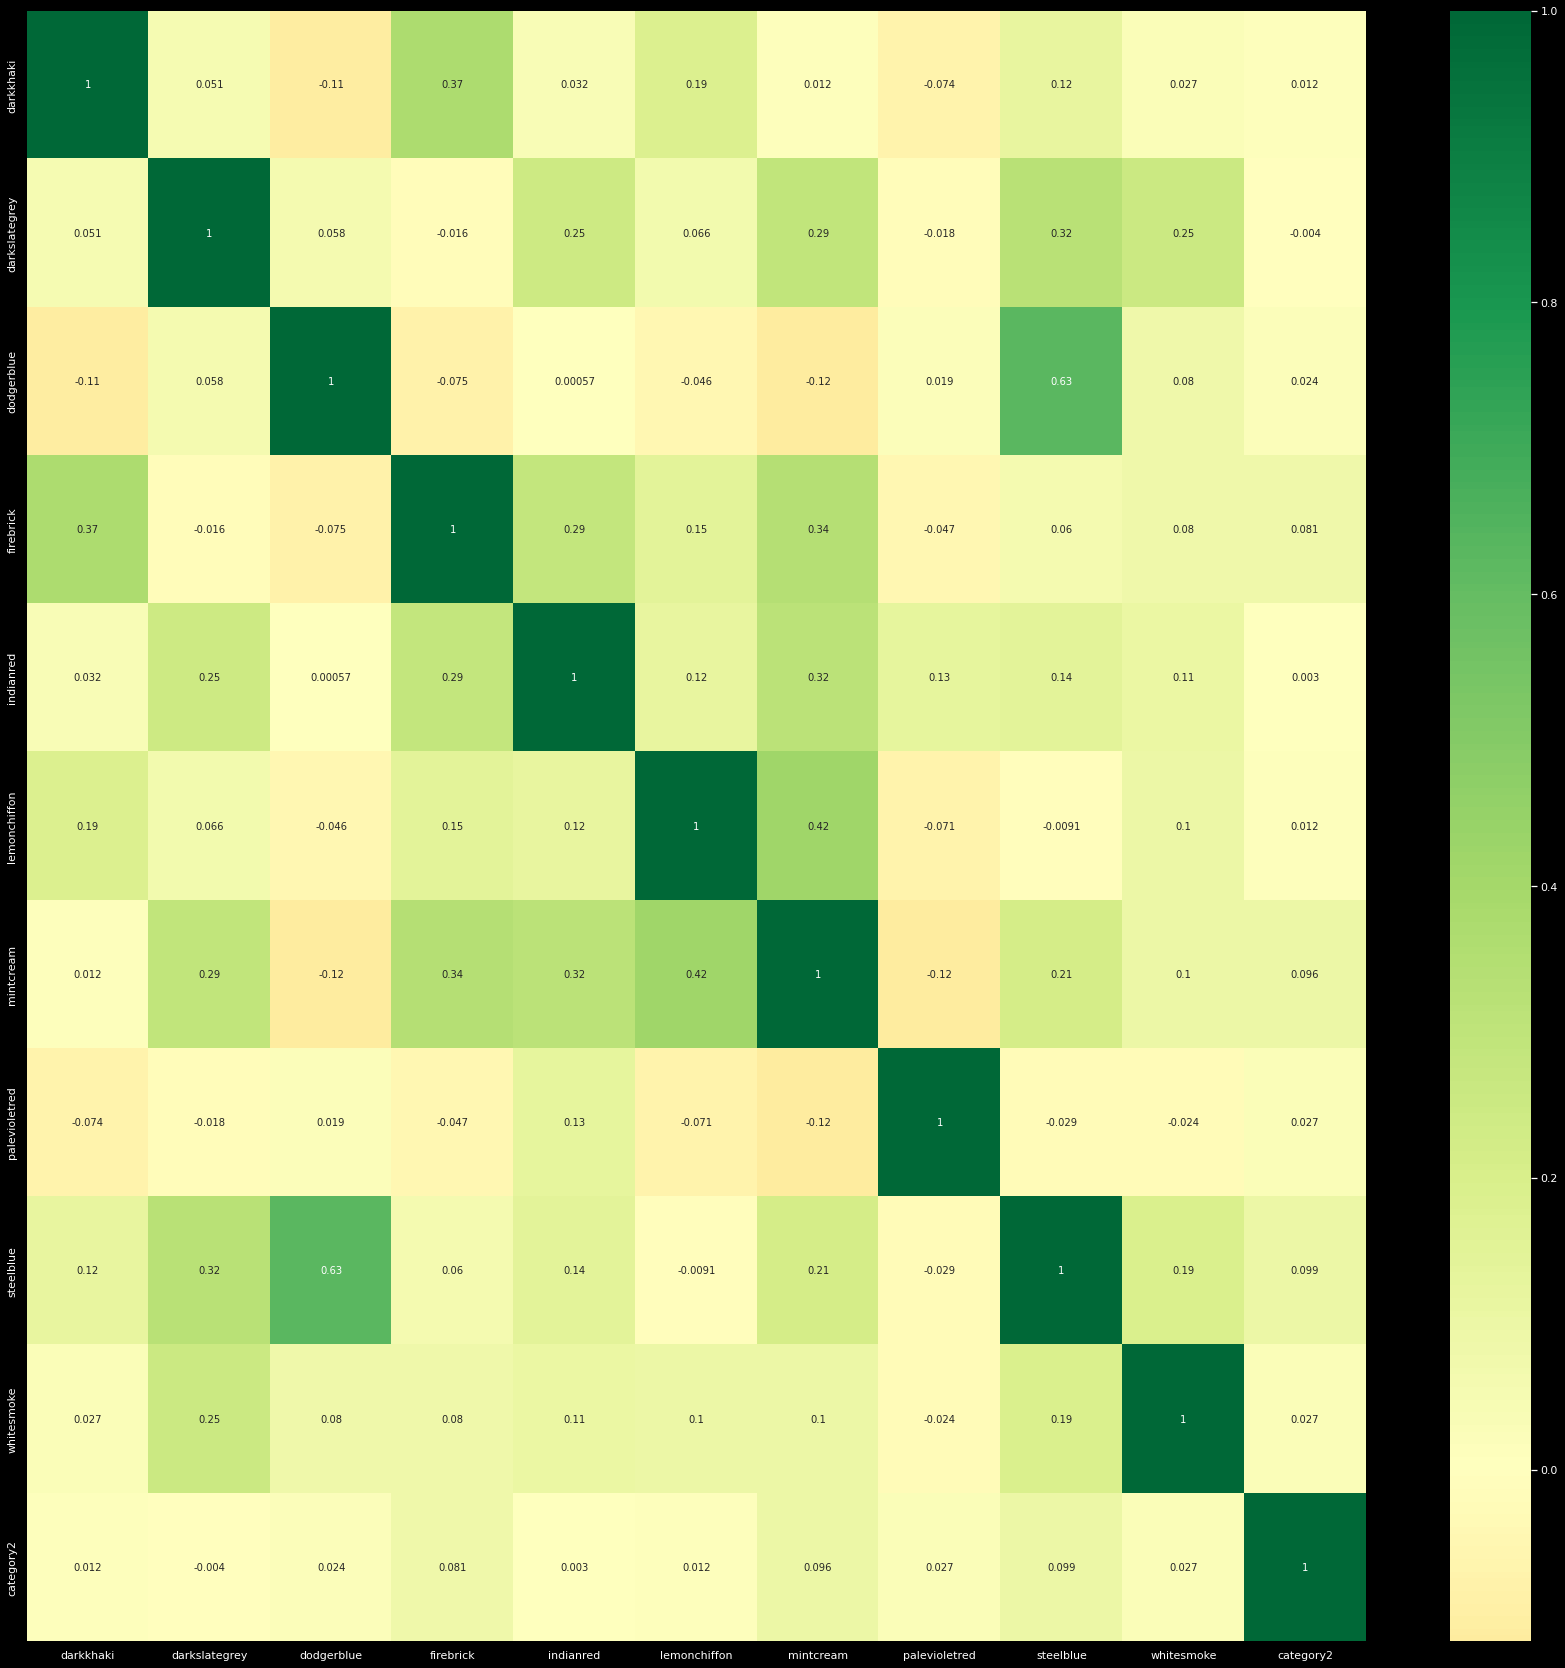

In [ ]:
plt.figure(figsize=(30,30))
p=sns.heatmap(data.corr(), annot=True,cmap='RdYlGn',center=0) 

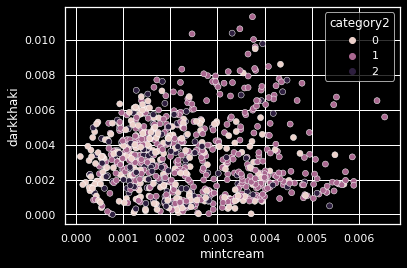

In [ ]:
#Look at data

sns.scatterplot(x="mintcream", y="darkkhaki", hue="category2", data=data)

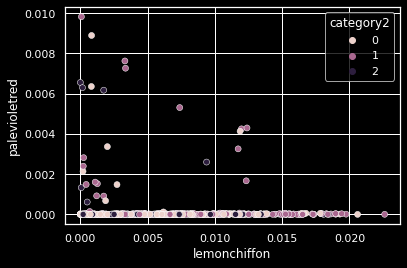

In [ ]:
#Look at data

sns.scatterplot(x="lemonchiffon", y="palevioletred", hue="category2", data=data)

##Prepare Data

**ENCODING**

The dataset["competitor"] column is strings. You will first turn these competitors into unique numbers,then use the to_categorical() function from keras.utils to turn these numbers into their one-hot encoded representation. This is because we just want one of the neurons to be activated by class

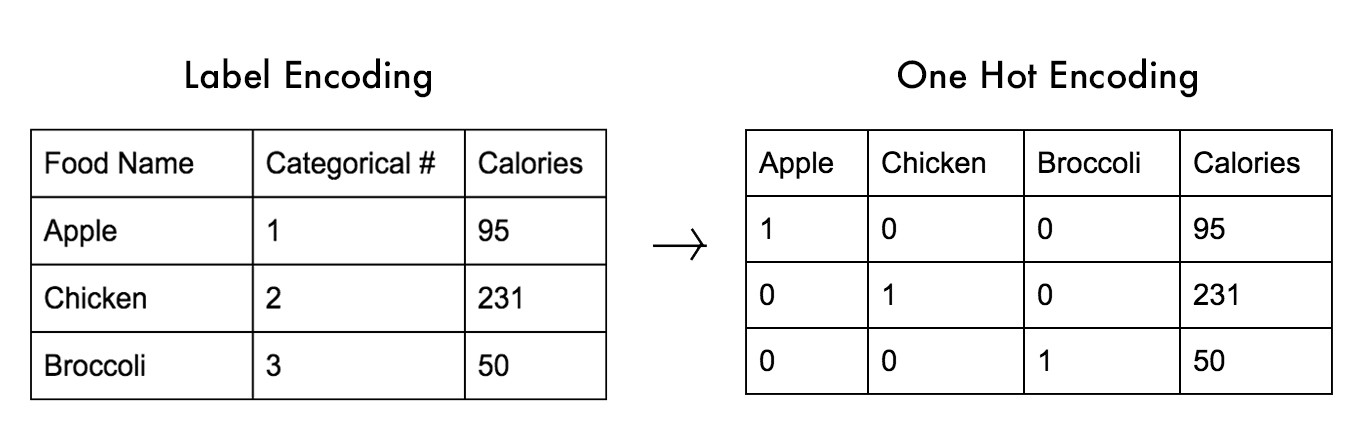

We first turn our response variable into a categorical variable with pandas Categorical, this allows us to redefine the column using the categorical codes (cat codes) of the different categories. 

Now that our categories are each represented by a unique integer, we can use the to_categorical function to turn them into one-hot encoded vectors, where each component is 0 except for the one corresponding to the labeled categories.

In [ ]:
#now we generate onhot vectors

# Import to_categorical from keras utils module
from tensorflow.keras.utils import to_categorical

coordinates = data.drop(['category2'], axis=1)
# Use to_categorical on your labels
category = to_categorical(data.category2)

# Now print the one-hot encoded labels
print('One-hot encoded category: \n',category)

One-hot encoded category: 
 [[0. 0. 1.]
 [0. 1. 0.]
 [0. 0. 1.]
 ...
 [0. 1. 0.]
 [1. 0. 0.]
 [1. 0. 0.]]


**SPLIT INTO TRAIN AND TEST**

In [ ]:
#same code as last time

#declare features
X = data.loc[:,['mintcream','darkkhaki','steelblue','whitesmoke','darkslategrey','indianred','dodgerblue','firebrick','palevioletred','lemonchiffon']]

#declare targets "classes"
y = category


In [ ]:
print(X)

     mintcream  darkkhaki  steelblue  ...  firebrick  palevioletred  lemonchiffon
0     0.003958   0.009773   0.000103  ...   0.000393       0.000004      0.004655
1     0.001063   0.003271   0.000046  ...   0.000000       0.000000      0.000375
2     0.000395   0.001241   0.000007  ...   0.000000       0.001331      0.000072
3     0.001610   0.003061   0.000305  ...   0.000000       0.000000      0.000614
4     0.000436   0.003412   0.000000  ...   0.000000       0.006556      0.000006
..         ...        ...        ...  ...        ...            ...           ...
823   0.001178   0.003203   0.000022  ...   0.000000       0.000000      0.000756
824   0.001960   0.002508   0.000090  ...   0.000000       0.000000      0.009670
825   0.002167   0.003107   0.000042  ...   0.000000       0.000011      0.003778
826   0.001386   0.006743   0.000048  ...   0.000000       0.000000      0.003772
827   0.001324   0.005096   0.000088  ...   0.000000       0.000000      0.002009

[828 rows x 10 

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 21)

In [ ]:
# Feature Scaling because yes we don't want one independent variable dominating the other and it makes computations easy
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

joblib.dump(sc, 'scaler_x.pkl')

['scaler_x.pkl']

In [ ]:
#visualize our data
#we can see that scikitlearn doesnt care if it is a dataframe or a numpy array, because they all function on the same way 
print(X_train)
print(y_train)

[[-1.02187523 -1.22071763  8.0548023  ... -0.55678315 -0.096273
  -1.24579564]
 [-0.09394303  0.83765358 -0.34910519 ... -0.55678315 -0.14329477
   0.25293884]
 [ 2.36142114 -0.65007973 -0.90599054 ...  0.74747838 -0.096273
   2.68961902]
 ...
 [-0.01792955  0.20144597 -0.09597461 ... -0.55678315 -0.13545782
  -0.1859566 ]
 [-0.35066599 -0.3328623   0.20778044 ... -0.55678315 -0.14329477
   0.83509828]
 [ 0.36930651 -0.98147524 -0.75411329 ...  0.61018082 -0.11978395
   0.13500293]]
[[0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 ...
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]]


#Build model

From the cheatSheet
Multiclass classification >> 
      activation = relu for hidden layers / softmax for final layer
      loss = categorical cross entropy
      optimizer = adam
      input from data, is 2 columns
      output is 1 out of 4 classes

In [ ]:
# Instantiate a sequential model
model = tf.keras.models.Sequential()
  
# Add 3 dense layers of 128, 64 and 32 neurons each
model.add(tf.keras.layers.Dense(128, input_shape=(10,), activation='sigmoid'))
model.add(tf.keras.layers.Dense(64, activation='relu'))
model.add(tf.keras.layers.Dense(32, activation='relu'))

    
# Add a dense layer with as many neurons as category
model.add(tf.keras.layers.Dense(3, activation="sigmoid"))
  
# Compile your model using categorical_crossentropy loss
model.compile(loss="categorical_crossentropy",
              optimizer='adam',
              metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               1408      
_________________________________________________________________
dense_1 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_2 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_3 (Dense)              (None, 3)                 99        
Total params: 11,843
Trainable params: 11,843
Non-trainable params: 0
_________________________________________________________________


#Train model

In [ ]:
# Fit your model to the training data for 100 epochs
#we assign this to history variable so we can plot the training data
history = model.fit(X_train,y_train,epochs=50, validation_split=0.1)

Epoch 1/50
19/19 [==============================] - 1s 32ms/step - loss: 1.0394 - accuracy: 0.4706 - val_loss: 0.9775 - val_accuracy: 0.5373
Epoch 2/50
19/19 [==============================] - 0s 5ms/step - loss: 1.0023 - accuracy: 0.5328 - val_loss: 0.9606 - val_accuracy: 0.5373
Epoch 3/50
19/19 [==============================] - 0s 4ms/step - loss: 0.9768 - accuracy: 0.5261 - val_loss: 0.9503 - val_accuracy: 0.5373
Epoch 4/50
19/19 [==============================] - 0s 4ms/step - loss: 0.9667 - accuracy: 0.5361 - val_loss: 0.9412 - val_accuracy: 0.5522
Epoch 5/50
19/19 [==============================] - 0s 5ms/step - loss: 0.9626 - accuracy: 0.5361 - val_loss: 0.9315 - val_accuracy: 0.5821
Epoch 6/50
19/19 [==============================] - 0s 4ms/step - loss: 0.9628 - accuracy: 0.5345 - val_loss: 0.9367 - val_accuracy: 0.5522
Epoch 7/50
19/19 [==============================] - 0s 4ms/step - loss: 0.9605 - accuracy: 0.5445 - val_loss: 0.9262 - val_accuracy: 0.5821
Epoch 8/50
19/19 [=

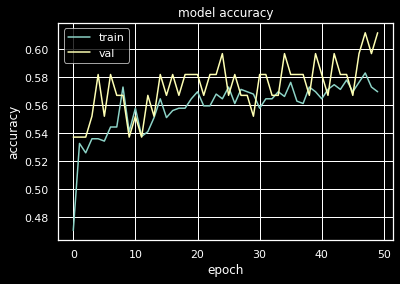

In [ ]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

#Evaluate model on test data

In [ ]:
# Evaluate your model accuracy on the test data
accuracy = model.evaluate(X_test,y_test)[1]

# Print accuracy
print('Accuracy:', accuracy)

6/6 [==============================] - 0s 2ms/step - loss: 0.8644 - accuracy: 0.6627
Accuracy: 0.6626505851745605


##Plot results

To draw a confusion matrix, we would need to go back from onehot encoding to class, we do that with .argmax method which finds which column has the highest score

(<Figure size 432x288 with 2 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fd3daae5610>)

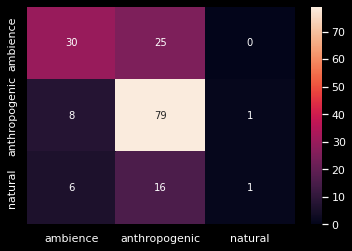

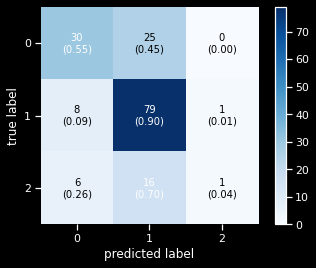

In [ ]:
from sklearn.metrics import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix

#Get the predictions for the test set
y_pred = model.predict(X_test)

#instanciate the matrix
confmatrix = confusion_matrix(y_test.argmax(axis=1),y_pred.argmax(axis=1)) 

#Draw it in 2 different ways
sns.heatmap(confmatrix, xticklabels=["ambience","anthropogenic","natural"], yticklabels=["ambience", "anthropogenic","natural"], annot = True)
plot_confusion_matrix(confmatrix,colorbar=True,show_absolute=True,show_normed=True,hide_spines = True)

In [ ]:
print(y_test.argmax)

<built-in method argmax of numpy.ndarray object at 0x7fd3cdf66c60>


In [ ]:
model.save('model_noise.h5')

In [ ]:
import matplotlib.pyplot as plt
from scipy import misc
import imageio
from PIL import Image
import numpy as np
import pandas as pd
from matplotlib import colors
from scipy.spatial import cKDTree as KDTree
import glob


In [ ]:
im = Image.open('/content/gdrive/MyDrive/LondonSoundSurvey/map_jpg/Aragon Road E6 April.jpg')


In [ ]:
print(im)

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=946x575 at 0x7FD3DAC2D0D0>


In [ ]:
map_result=[]

use_colors = colors.cnames
print (use_colors)
# translate hexstring to RGB tuple
named_colors = {k: tuple(map(int, (v[1:3], v[3:5], v[5:7]), 3*(16,)))
                for k, v in use_colors.items()}
ncol = len(named_colors)

no_match = named_colors['purple']

# make an array containing the RGB values 
color_tuples = list(named_colors.values())
color_tuples.append(no_match)
color_tuples = np.array(color_tuples)

color_names = list(named_colors)
color_names.append('no match')

# build tree
tree = KDTree(color_tuples[:-1])
# tolerance for color match `inf` means use best match no matter how
# bad it may be
tolerance = np.inf
# find closest color in tree for each pixel in picture
dist, idx = tree.query(im, distance_upper_bound=tolerance)
# count and reattach names
counts = dict(zip(color_names, np.bincount(idx.ravel(), None, ncol+1)))
map_result.append(counts)

print(map_result)

{'aliceblue': '#F0F8FF', 'antiquewhite': '#FAEBD7', 'aqua': '#00FFFF', 'aquamarine': '#7FFFD4', 'azure': '#F0FFFF', 'beige': '#F5F5DC', 'bisque': '#FFE4C4', 'black': '#000000', 'blanchedalmond': '#FFEBCD', 'blue': '#0000FF', 'blueviolet': '#8A2BE2', 'brown': '#A52A2A', 'burlywood': '#DEB887', 'cadetblue': '#5F9EA0', 'chartreuse': '#7FFF00', 'chocolate': '#D2691E', 'coral': '#FF7F50', 'cornflowerblue': '#6495ED', 'cornsilk': '#FFF8DC', 'crimson': '#DC143C', 'cyan': '#00FFFF', 'darkblue': '#00008B', 'darkcyan': '#008B8B', 'darkgoldenrod': '#B8860B', 'darkgray': '#A9A9A9', 'darkgreen': '#006400', 'darkgrey': '#A9A9A9', 'darkkhaki': '#BDB76B', 'darkmagenta': '#8B008B', 'darkolivegreen': '#556B2F', 'darkorange': '#FF8C00', 'darkorchid': '#9932CC', 'darkred': '#8B0000', 'darksalmon': '#E9967A', 'darkseagreen': '#8FBC8F', 'darkslateblue': '#483D8B', 'darkslategray': '#2F4F4F', 'darkslategrey': '#2F4F4F', 'darkturquoise': '#00CED1', 'darkviolet': '#9400D3', 'deeppink': '#FF1493', 'deepskyblue'

In [ ]:
df = pd.DataFrame(map_result) 

selection = df.loc[:1,['mintcream','darkkhaki','steelblue','whitesmoke','darkslategrey','indianred','dodgerblue','firebrick','palevioletred','lemonchiffon']]
selection_percentage = selection/543950


In [ ]:
print(selection_percentage)

   mintcream  darkkhaki  steelblue  ...  firebrick  palevioletred  lemonchiffon
0   0.001132   0.005846   0.000013  ...        0.0            0.0      0.013082

[1 rows x 10 columns]


In [ ]:
inputData=selection_percentage.to_numpy(np.float64)

In [ ]:
print(inputData)

[[1.13245703e-03 5.84612556e-03 1.28688299e-05 3.33174005e-02
  2.91019395e-03 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 1.30820848e-02]]


In [ ]:
scalerX = joblib.load("scaler_x.pkl")
x_scaled = scalerX.transform(inputData)

In [ ]:
print(x_scaled)

[[-0.99605968  1.27626498 -0.85536456  2.26281189  2.08901598 -0.93499856
  -0.26810259 -0.55678315 -0.14329477  1.56962468]]


In [ ]:
y_pred=model.predict(x_scaled)
print(y_pred)

[[0.6779258  0.73693717 0.3719777 ]]


In [ ]:
def prediction(a):
  model = tf.keras.models.load_model('model_noise.h5')
  prediction = model.predict(a)
  return prediction


##Save scaler model for later use
##joblib.dump(scalerY, 'scalerY.pkl')


#Load saved model


##pathInp = r"C:\Users\admin\Documents\DataEncode\query.txt"
##inputData = np.genfromtxt(pathInp)
#reshape or normalize here

##prediction = model.predict(inputData)
#reshape or normalize here 

##pathOut = r"C:\Users\admin\Documents\DataEncode\prediction.txt"
##np.savetxt(pathOut, prediction)


In [ ]:
y=prediction(x_scaled)

In [ ]:
print(y)

[[0.6779258  0.73693717 0.3719777 ]]


In [ ]:
print(y[0][0])

0.6779258


In [ ]:
if y[0][0] > y[0][1] and y[0][0] > y[0][2]:
  print('ambience')
elif y[0][1] > y[0][0] and y[0][1] > y[0][2]:
  print('anthropogenic')
else:
  print('natural')

anthropogenic
